# Getting Started with TensorFlow 2.0 in 7 Days
## 2.1 Understanding the Limits of Linear Regression

In [1]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
from tensorflow import keras

## Keras Datasets

These are provided for educational purposes, and are often available as both training and test datasets

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

Fashion MNIST is a dataset of 70,000 grayscale images. These images come in 10 categories and have a size of 28 pixels by 28 pixels. We will make use of 60,000 images for training a model, and 10,000 images for evaluation.

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)

(60000, 28, 28)


In [6]:
print(train_labels.shape)

(60000,)


In [7]:
print(test_images.shape)

(10000, 28, 28)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Look at one image

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

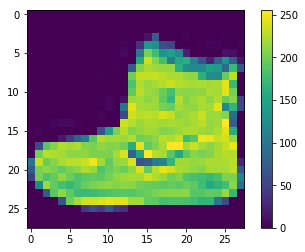

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
print(train_labels[0])

9


In [12]:
print(class_names[train_labels[0]])

Ankle boot


__Scale Images to a range between 0 and 1__

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Linear Regression

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [16]:
model.fit(train_images, train_labels, epochs=10)

W0611 12:46:54.241896 140321728300928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6028 - accuracy: 0.7965
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4632 - accuracy: 0.8418
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4355 - accuracy: 0.8499
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4238 - accuracy: 0.8537
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4139 - accuracy: 0.8569
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4080 - accuracy: 0.8587
Epoch 7/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4016 - accuracy: 0.8610
Epoch 8/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3979 - accuracy: 0.8614
Epoch 9/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3955 - accuracy: 0.8622
Epoch 10/10
60

### Evaluate the model

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4487 - accuracy: 0.8443

Test accuracy: 0.8443


### Make predictions

In [18]:
predictions = model.predict(test_images)
print(predictions[0])

[3.3100363e-07 2.3782899e-08 1.0732964e-05 5.1430284e-06 6.6838534e-06
 1.1824602e-01 2.8202669e-05 5.0293423e-02 9.6917534e-03 8.2171774e-01]


In [19]:
print(np.argmax(predictions[0]))

9


In [20]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


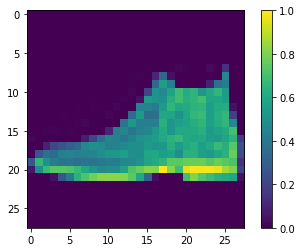

In [21]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
print(class_names[test_labels[0]])

Ankle boot
